<a href="https://colab.research.google.com/github/lblogan14/colab/blob/master/animation_on_colab_for_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install prerequisites like, xvbf, opengl, and other python dev packages:

In [1]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip3 -q install gym
!pip3 install piglet
!pip3 -q install pyglet
!pip3 -q install pyopengl
!pip3 -q install pyvirtualdisplay
!apt install xvfb -y

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Extracting templates from packages: 100%
    100% |████████████████████████████████| 61kB 3.8MB/s 
    100% |████████████████████████████████| 92kB 7.5MB/s 
  Running setup.py bdist_wheel for piglet ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


The following code prompts a recorded video to see the simulated environment,

In [2]:
import gym
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


In [3]:
obs = env.reset()
#env.render()
print('initial observation:', obs)

initial observation: [ 0.02927678  0.03308548  0.02434802 -0.03655837]


In [4]:
action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

next observation: [ 0.02993849 -0.16237702  0.02361685  0.26370607]
reward: 1.0
done: False
info: {}


In [0]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [6]:
# recard frames
frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)

env.render()

test episode: 0 R: 10.0
test episode: 1 R: 12.0
test episode: 2 R: 27.0


True

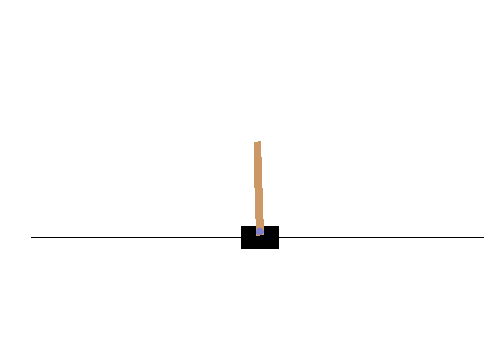

In [8]:
# play  
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())